model from my google drive here:
https://drive.google.com/drive/my-drive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()
from google.colab import drive

# 1.- Exploration

In [3]:
drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/train-small.csv'


Mounted at /content/gdrive


In [5]:
train_df = pd.read_csv(path)
print(f'There are {train_df.shape[0]}rows and {train_df.shape[1]}columns in this dataframe')
train_df.head()

There are 1000rows and 16columns in this dataframe


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


Have a look at the various columns in this csv file. This file contains the names of chest x-ray images ("Image" column) and the columns filled with 1 and 0 identify which diagnoses were given based on each x-ray image.

###1.1 Data Types and Null Values Check

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

### 1.2 Unique IDs Check
PatientId has an identification number of each patient. One thing you would like to know about medical dataset like this is if you're looking at repeated data for certain patients or wheter each image represents a different person.

In [8]:
print(f"Total of patients id are {train_df['PatientId'].count()}, from those unique ids are {train_df['PatientId'].value_counts().shape[0]}")

Total of patients id are 1000, from those unique ids are 928


We can see, the number of unique patients in the dataset is less than the total number so there must be one some overlap. For patients with multiple records.

###1.3 Data Label

In [9]:
columns = train_df.keys()
columns = list(columns)
print(columns)

['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [10]:
#Let's remove the those who we don't need
columns.remove('Image')
columns.remove('PatientId')
# Total classes
print(f"There are {len(columns)} columns of labels for these conditions: {columns}")

There are 14 columns of labels for these conditions: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [11]:
for column in columns:
  print(f"The class {column} has {train_df[column].sum()} samples")

The class Atelectasis has 106 samples
The class Cardiomegaly has 20 samples
The class Consolidation has 33 samples
The class Edema has 16 samples
The class Effusion has 128 samples
The class Emphysema has 13 samples
The class Fibrosis has 14 samples
The class Hernia has 2 samples
The class Infiltration has 175 samples
The class Mass has 45 samples
The class Nodule has 54 samples
The class Pleural_Thickening has 21 samples
The class Pneumonia has 10 samples
The class Pneumothorax has 38 samples


###1.4 Data Visualization

Display Random Images


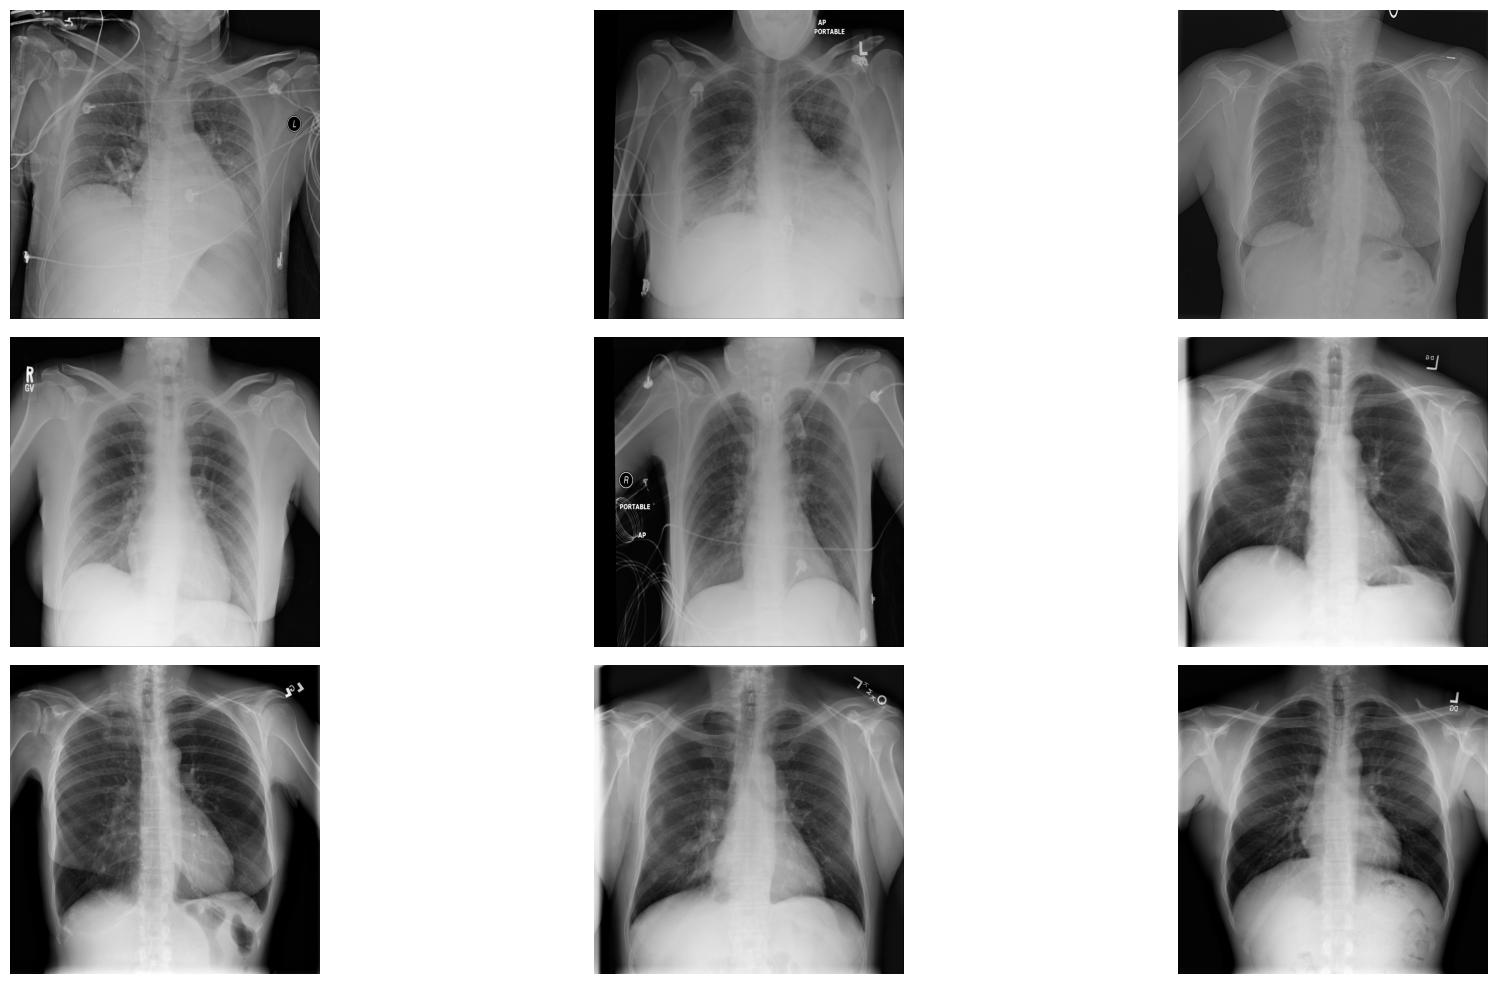

In [16]:
#Extraction of numpy values from Image
images = train_df['Image'].values

#Let's extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

#Location
img_dir = '/content/gdrive/MyDrive/images-small'
print("Display Random Images")

#Adjustment of the size of the images
plt.figure(figsize=(20,10))

#Iterate and plot names of your images
for i in range(9):
  plt.subplot(3, 3, i +1)
  img = plt.imread(os.path.join(img_dir, random_images[i]))
  plt.imshow(img, cmap="gray")
  plt.axis('off')

#Adjust subplot parameters to give specified padding
plt.tight_layout()


### 1.5 Investigating a Single Image


The dimesions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 0.9804 and the minimum is 0.0000
The mean value of the pixels is 0.4796 and the standard deviation is 0.2757


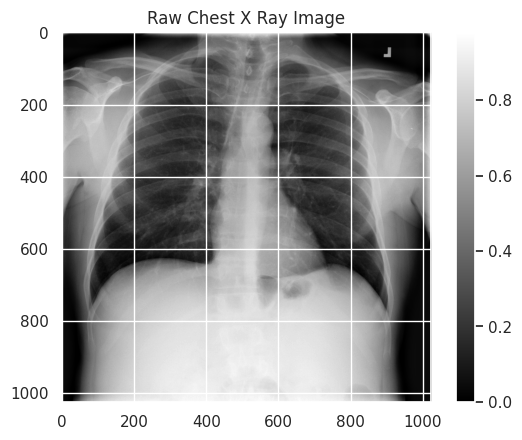

In [17]:
sample_img = train_df.Image[0]
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title("Raw Chest X Ray Image")
print(f"The dimesions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

###1.6 Investigating Pixel Value Distribution


<ipython-input-18-a03aa4087676>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(),


Text(0, 0.5, '# Pixels in Image')

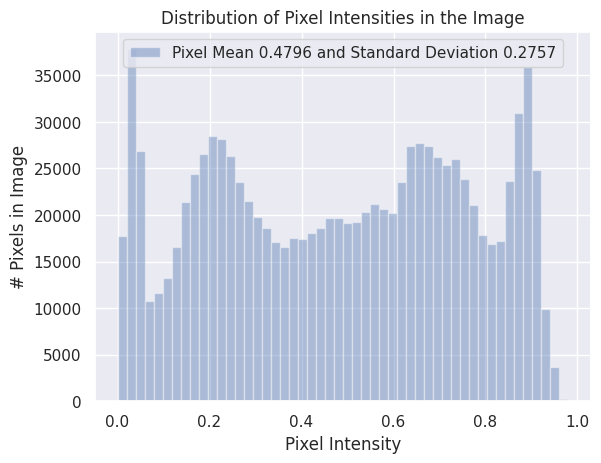

In [18]:
sns.distplot(raw_image.ravel(),
             label = f'Pixel Mean {np.mean(raw_image):.4f} and Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc="upper center")
plt.title("Distribution of Pixel Intensities in the Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("# Pixels in Image")

#2.- Image Preprocessing in Keras
Before training we will first modify the images to be better suited for training a CNN, we will use the Keras ImageDataGenerator function to perform data preprocessing and data augmentation.

In [19]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
#Normalize images
image_generator = ImageDataGenerator(
    samplewise_center=True, #Set each sample mean to 0.
    samplewise_std_normalization=True #Divide each input by its standard deviation
)

### 2.1 Standardization

The `image_generator` you created above will act to adjust your image data such that the new mean of the data will be zero, and the standard deviation of the data will be 1.  

In other words, the generator will replace each pixel value in the image with a new value calculated by subtracting the mean and dividing by the standard deviation.

$$\frac{x_i - \mu}{\sigma}$$

Run the next cell to pre-process your data using the `image_generator`. In this step you will also be reducing the image size down to 320x320 pixels.

In [21]:
# Flow from directory with specified batch size and target image size
generator = image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/gdrive/MyDrive/images-small',
    x_col="Image",  # feature
    # Let's say we build a model for mass detection
    y_col=["Mass"],  # labels
    class_mode="raw",  # "Mass" column should be in train_df
    shuffle=False,  # shuffle the rows or not
    target_size=(320, 320)  # width and height of output image
)


Found 1000 validated image filenames.


Plot up and pre-processed image

The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 3.9349 and the minimum is -3.5639
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


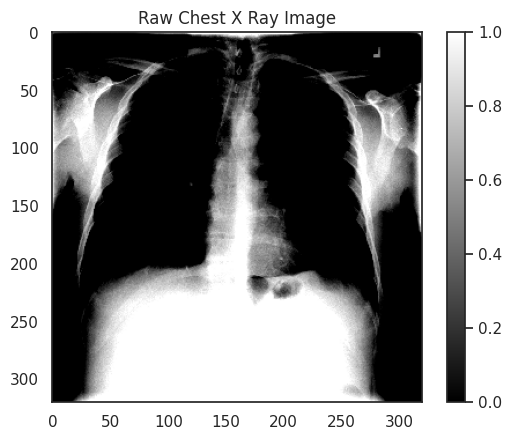

In [22]:
sns.set_style("white")
generated_image, label= generator.__getitem__(0)
plt.imshow(generated_image[0], cmap="gray")
plt.colorbar()
plt.title("Raw Chest X Ray Image")
print(f'The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height')
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

<ipython-input-23-7e6abfcc88c5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(),
<ipython-input-23-7e6abfcc88c5>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generated_image[0].ravel(),


Text(0, 0.5, '# Pixel')

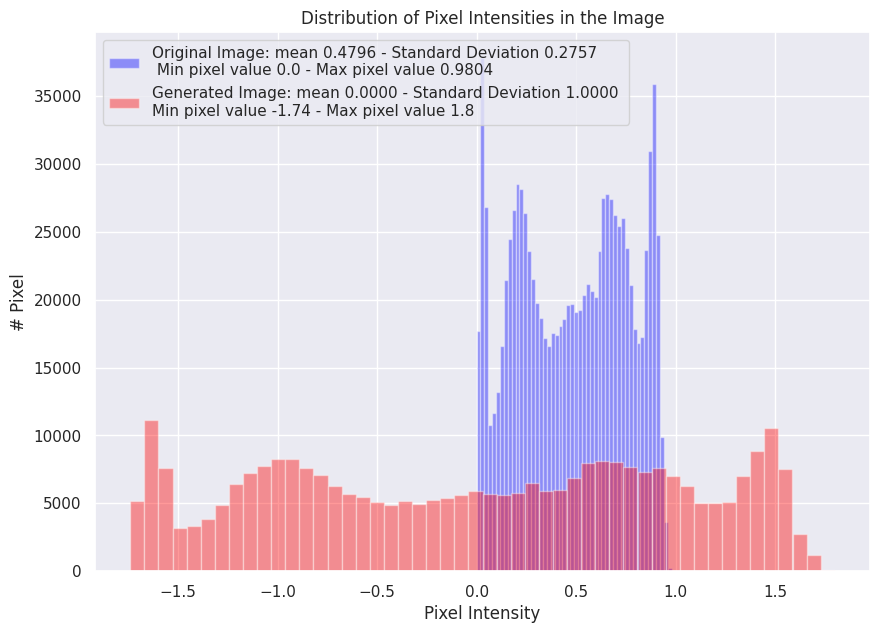

In [23]:
#Let's include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10,7))

#Plot histogram for original image
sns.distplot(raw_image.ravel(),
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n '
             f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue',
             kde=False)

# Plot histogram for generated image
sns.distplot(generated_image[0].ravel(),
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}',
             color='red',
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')